In [35]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import matplotlib.pyplot as plt
from tueplots import bundles
from scipy import stats
from scipy.stats import spearmanr, pearsonr, linregress, chi2_contingency
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from scipy.stats import t as t_dist
import seaborn as sns
import statsmodels.api as sm
from matplotlib.patches import Patch



# bundles.icml2022()
plt.rcParams.update(bundles.icml2024())

plt.rcParams['text.usetex'] = False
sns.set_style("whitegrid")


In [2]:
import plotly.io as pio

pio.templates["custom"] = pio.templates["plotly"]
pio.templates["custom"].layout.font.family = "Times New Roman"
pio.templates.default = "custom"

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = ['Times New Roman']

plt.rcParams.update(bundles.icml2024())
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.usetex'] = False

In [3]:
df_2002 = pd.read_csv('../data/final_csv/2002.csv')
df_2012 = pd.read_csv('../data/final_csv/2012.csv')
df_2022 = pd.read_csv('../data/final_csv/2022.csv')

In [4]:
df_2002.shape, df_2012.shape, df_2022.shape

((21874, 67), (28013, 67), (20000, 67))

# cleaning

In [5]:
df_2002.drop(columns=[i for i in df_2002.columns if 'egal' in i], inplace=True)
df_2002.drop(columns=['work_status', 'spouse_work_status'], inplace=True)
# print(set(cols).difference(set(df_2002.columns)))
# print((set(df_2002.columns)).difference(set(cols)))

df_2012.drop(columns=[i for i in df_2012.columns if 'egal' in i], inplace=True)
df_2012.drop(columns=[ 'work_status', 'spouse_work_status'], inplace=True)
# print(set(cols).difference(set(df_2012.columns)))
# print((set(df_2012.columns)).difference(set(cols)))

df_2022.drop(columns=[i for i in df_2022.columns if 'egal' in i], inplace=True)
df_2022.drop(columns=[ 'work_status', 'spouse_work_status'], inplace=True)
# print(set(cols).difference(set(df_2022.columns)))
# print((set(df_2022.columns)).difference(set(cols)))

print(df_2002.shape, df_2012.shape, df_2022.shape)


df_2002_married = df_2002[df_2002['marital'] == 'Married']
df_2012_married = df_2012[df_2012['marital'] == 'Married']
df_2022_married = df_2022[df_2022['marital'] == 'Married']

print(df_2002_married.shape, df_2012_married.shape, df_2022_married.shape)

df_2002_married = df_2002_married[df_2002_married['age']>=18]
df_2012_married = df_2012_married[df_2012_married['age']>=18]
df_2022_married = df_2022_married[df_2022_married['age']>=18]


print(df_2002_married.shape, df_2012_married.shape, df_2022_married.shape)

df_2002_married = df_2002_married[(df_2002_married['sex']== 'Male') | (df_2002_married['sex']== 'Female')]
df_2012_married = df_2012_married[(df_2012_married['sex']== 'Male') | (df_2012_married['sex']== 'Female')]
df_2022_married = df_2022_married[(df_2022_married['sex']== 'Male') | (df_2022_married['sex']== 'Female')]

print(df_2002_married.shape, df_2012_married.shape, df_2022_married.shape)

df_2002_married['TOPBOT'] = df_2002_married[['TOPBOT', 'C_ALPHAN']].apply(lambda x: 11-x[0] if x[1] == 'NO' else x[0], axis=1)
df_2012_married['TOPBOT'] = df_2012_married[['TOPBOT', 'C_ALPHAN']].apply(lambda x: 11-x[0] if x[1] == 'NO' else x[0], axis=1)
df_2022_married['TOPBOT'] = df_2022_married[['TOPBOT', 'C_ALPHAN']].apply(lambda x: 11-x[0] if x[1] == 'NO' else x[0], axis=1)

df_2002_married['code_income_control'] = df_2002_married['code_income_control'].apply(lambda x: x.split(' ')[-1] if pd.notna(x) else x)
df_2012_married['code_income_control'] = df_2012_married['code_income_control'].apply(lambda x: x.split(' ')[-1] if pd.notna(x) else x)
df_2022_married['code_income_control'] = df_2022_married['code_income_control'].apply(lambda x: x.split(' ')[-1] if pd.notna(x) else x)

(21874, 59) (28013, 59) (20000, 59)
(21874, 59) (28013, 59) (20000, 59)
(21874, 59) (28013, 59) (20000, 59)
(21869, 59) (28008, 59) (19991, 59)


/var/folders/xj/0v15js910cl95xfc7752353r0000gn/T/ipykernel_7258/2382048830.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_2002_married['TOPBOT'] = df_2002_married[['TOPBOT', 'C_ALPHAN']].apply(lambda x: 11-x[0] if x[1] == 'NO' else x[0], axis=1)
/var/folders/xj/0v15js910cl95xfc7752353r0000gn/T/ipykernel_7258/2382048830.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_2012_married['TOPBOT'] = df_2012_married[['TOPBOT', 'C_ALPHAN']].apply(lambda x: 11-x[0] if x[1] == 'NO' else x[0], axis=1)
/var/folders/xj/0v15js910cl95xfc7752353r0000gn/T/ipykernel_7258/2382048830.py:40: FutureWarning: Series.__getitem_

In [6]:
df_2002.shape, df_2012.shape, df_2022.shape

((21874, 59), (28013, 59), (20000, 59))

In [7]:
# Combine datasets with year labels
df_2002_married['year'] = 2002
df_2012_married['year'] = 2012
df_2022_married['year'] = 2022

df_combined = pd.concat([df_2002_married, df_2012_married, df_2022_married], ignore_index=True)

In [8]:
df_combined['CASEID'].nunique(), df_combined.shape

(69868, (69868, 69))

In [9]:
df_combined[df_combined['sex']=='Male'][['hh_wrk_hrs', 'eg_score_norm']].corr()

,hh_wrk_hrs,eg_score_norm
hh_wrk_hrs,1.000000,-0.091589
eg_score_norm,-0.091589,1.000000


In [10]:
df_combined[df_combined['sex']=='Female'][['hh_wrk_hrs', 'eg_score_norm']].corr()

,hh_wrk_hrs,eg_score_norm
hh_wrk_hrs,1.000000,-0.253376
eg_score_norm,-0.253376,1.000000


## analysis plots

In [11]:
df_eg_analysis = df_combined[df_combined['eg_score_norm'].notna()].copy()

In [12]:
edu_dist = df_combined.groupby(['year', 'educ_4_label']).size().reset_index(name='count')
edu_dist['educ_4_label'] = edu_dist['educ_4_label'].apply(lambda x: 'Post-secondary' if x == 'Post-sec / Short tertiary' else x)
edu_total = df_combined.groupby(['year']).size().reset_index(name='total')
edu_dist = edu_dist.merge(edu_total, on=['year'])
edu_dist['percentage'] = (edu_dist['count'] / edu_dist['total']) * 100

edu_dist['year'] = edu_dist['year'].astype(str)

category_orders = {
    'educ_4_label': ['No/Primary', 'Secondary', 'Post-secondary', 'University+'],
    'year': ['2002', '2012', '2022']
}


fig_edu_pub = px.bar(
    edu_dist,
    x='year',
    y='percentage',
    color='educ_4_label',
    barmode='stack',
    category_orders=category_orders,
    title='Education Level Distribution Across Years',
    labels={
        'percentage': 'Share (%)',
        'year': 'Year',
        'educ_4_label': 'Education Level'
    },
    height=700
)

fig_edu_pub.update_layout(
    font=dict(size=25),
    title_font_size=27.5,
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Education Level',
    width=600,
)

fig_edu_pub.update_xaxes(showgrid=False)
fig_edu_pub.update_yaxes(range=[0, 100], showgrid=True, gridwidth=1, gridcolor='lightgray')
fig_edu_pub.show()

/var/folders/xj/0v15js910cl95xfc7752353r0000gn/T/ipykernel_7258/61815310.py:32: UserWarning:

The figure layout has changed to tight



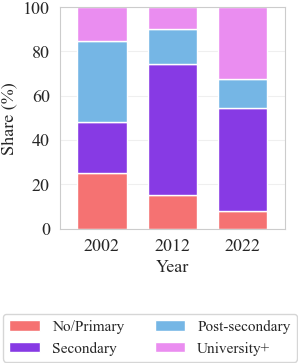

In [13]:
edu_dist = df_combined.dropna(subset=['educ_4_label']).groupby(['year', 'educ_4_label']).size().reset_index(name='count')
edu_dist['educ_4_label'] = edu_dist['educ_4_label'].apply(lambda x: 'Post-secondary' if x == 'Post-sec / Short tertiary' else x)
edu_total = df_combined.dropna(subset=['educ_4_label']).groupby(['year']).size().reset_index(name='total')
edu_dist = edu_dist.merge(edu_total, on=['year'])
edu_dist['percentage'] = (edu_dist['count'] / edu_dist['total']) * 100

edu_pivot = edu_dist.pivot(index='year', columns='educ_4_label', values='percentage')

category_order = ['No/Primary', 'Secondary', 'Post-secondary', 'University+']
edu_pivot = edu_pivot[category_order]

edu_colors = {
    'No/Primary': "#f57272",
    'Secondary': "#873ae4",
    'Post-secondary': "#75b6e5",
    'University+': "#ea8df0"
}

fig, ax = plt.subplots(figsize=(3.1, 4.2))

edu_pivot.plot(kind='bar', stacked=True, ax=ax, width=0.7, color=[edu_colors[col] for col in edu_pivot.columns])
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Share (%)', fontsize=13)
ax.set_ylim(0, 100)
ax.set_xticklabels(['2002', '2012', '2022'], rotation=0, fontsize=13)
ax.tick_params(axis='y', labelsize=13)  
ax.legend(frameon=True, loc='upper center', bbox_to_anchor=(0.4, -0.35), 
          ncol=2, fontsize=11)

ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../assets/education_distribution.pdf')
plt.show()

/var/folders/xj/0v15js910cl95xfc7752353r0000gn/T/ipykernel_7258/4222173803.py:33: UserWarning:

The figure layout has changed to tight



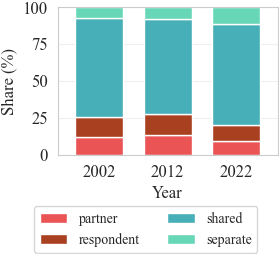

In [14]:
edu_dist = df_combined.dropna(subset=['code_income_control']).groupby(['year', 'code_income_control']).size().reset_index(name='count')
edu_total = df_combined.dropna(subset=['code_income_control']).groupby(['year']).size().reset_index(name='total')
edu_dist = edu_dist.merge(edu_total, on=['year'])
edu_dist['percentage'] = (edu_dist['count'] / edu_dist['total']) * 100

edu_pivot = edu_dist.pivot(index='year', columns='code_income_control', values='percentage')

category_order = ['partner', 'respondent', 'shared', 'separate']
edu_pivot = edu_pivot[category_order]

edu_colors = {
    'partner': "#ea5454",
    'respondent': "#a94020",
    'separate': "#68d7b7",
    'shared': "#47afb7"
}

fig, ax = plt.subplots(figsize=(3, 3))
edu_pivot.plot(kind='bar', stacked=True, ax=ax, width=0.7, color=[edu_colors[col] for col in edu_pivot.columns])

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Share (%)', fontsize=12)

ax.set_ylim(0, 100)
ax.set_xticklabels(['2002', '2012', '2022'], rotation=0, fontsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.legend(frameon=True, loc='upper center', bbox_to_anchor=(0.4, -0.30), 
          ncol=2, fontsize=10)

ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../assets/income_control_distribution.pdf')
plt.show()

/var/folders/xj/0v15js910cl95xfc7752353r0000gn/T/ipykernel_7258/2168826662.py:34: UserWarning:

The figure layout has changed to tight



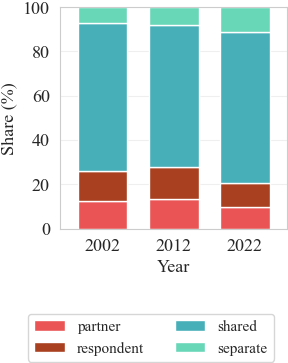

In [15]:
edu_dist = df_combined.dropna(subset=['code_income_control']).groupby(['year', 'code_income_control']).size().reset_index(name='count')
edu_dist['code_income_control'] = edu_dist['code_income_control'].apply(lambda x: 'Post-secondary' if x == 'Post-sec / Short tertiary' else x)
edu_total = df_combined.dropna(subset=['code_income_control']).groupby(['year']).size().reset_index(name='total')
edu_dist = edu_dist.merge(edu_total, on=['year'])
edu_dist['percentage'] = (edu_dist['count'] / edu_dist['total']) * 100

edu_pivot = edu_dist.pivot(index='year', columns='code_income_control', values='percentage')

category_order = ['partner', 'respondent', 'shared', 'separate']
edu_pivot = edu_pivot[category_order]

edu_colors = {
    'partner': "#ea5454",
    'respondent': "#a94020",
    'separate': "#68d7b7",
    'shared': "#47afb7"
}

fig, ax = plt.subplots(figsize=(3.1, 4.2))

edu_pivot.plot(kind='bar', stacked=True, ax=ax, width=0.7, color=[edu_colors[col] for col in edu_pivot.columns])

ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Share (%)', fontsize=13)

ax.set_ylim(0, 100)
ax.set_xticklabels(['2002', '2012', '2022'], rotation=0, fontsize=13)
ax.tick_params(axis='y', labelsize=13)  
ax.legend(frameon=True, loc='upper center', bbox_to_anchor=(0.4, -0.35), 
          ncol=2, fontsize=11)

ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../assets/finance.pdf')
plt.show()

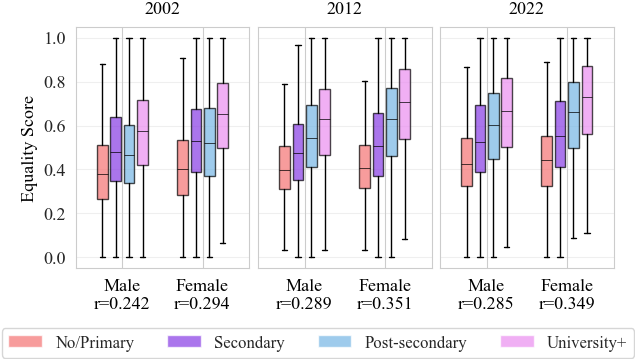

In [16]:
edu_to_num = {
    'No/Primary': 1,
    'Secondary': 2,
    'Post-secondary': 3,
    'University+': 4
}

df_eg_analysis['educ_4_label'] = df_eg_analysis['educ_4_label'].apply(lambda x:  'Post-secondary' if x == 'Post-sec / Short tertiary' else x)
correlation_data_gender = []
for year in [2002, 2012, 2022]:
    for gender in ['Male', 'Female']:
        year_gender_data = df_eg_analysis[(df_eg_analysis['year'] == year) & (df_eg_analysis['sex'] == gender)].copy()
        year_gender_data['edu_num'] = year_gender_data['educ_4_label'].map(edu_to_num)
        if len(year_gender_data) > 1:
            corr = year_gender_data[['edu_num', 'eg_score_norm']].corr().iloc[0, 1]
        else:
            corr = np.nan
        correlation_data_gender.append({'year': year, 'sex': gender, 'correlation': corr})

corr_gender_df = pd.DataFrame(correlation_data_gender)

edu_colors = {
    'No/Primary': "#f57272",
    'Secondary': "#873ae4",
    'Post-secondary': "#75b6e5",
    'University+': "#ea8df0"
}

category_order = ['No/Primary', 'Secondary', 'Post-secondary', 'University+']

fig, axes = plt.subplots(1, 3, figsize=(6, 3.2), sharey=True)
years = [2002, 2012, 2022]

for idx, (ax, year) in enumerate(zip(axes, years)):
    year_data = df_eg_analysis[df_eg_analysis['year'] == year]
    
    year_corr_data = corr_gender_df[corr_gender_df['year'] == year]
    male_corr = year_corr_data[year_corr_data['sex'] == 'Male']['correlation'].values[0]
    female_corr = year_corr_data[year_corr_data['sex'] == 'Female']['correlation'].values[0]
    
    positions = []
    box_data = []
    colors_list = []
    current_pos = 0
    
    for gender in ['Male', 'Female']:
        gender_data = year_data[year_data['sex'] == gender]
        gender_positions = []
        for edu_level in category_order:
            edu_data = gender_data[gender_data['educ_4_label'] == edu_level]['eg_score_norm'].dropna()
            if len(edu_data) > 0:
                box_data.append(edu_data)
                positions.append(current_pos)
                gender_positions.append(current_pos)
                colors_list.append(edu_colors[edu_level])
                current_pos += 0.25
        current_pos += 0.5
    
    bp = ax.boxplot(box_data, positions=positions, widths=0.2, patch_artist=True,
                showfliers=False, 
                medianprops=dict(color='black', linewidth=0.5))
    
    for patch, color in zip(bp['boxes'], colors_list):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    male_positions = positions[:4]  
    female_positions = positions[4:8]  
    male_center = np.mean(male_positions)
    female_center = np.mean(female_positions)
    
    # Customize axes with centered labels
    ax.set_title(f'{year}', fontsize=13, pad=10, color='black')
    ax.set_xticks([male_center, female_center])
    ax.set_xticklabels([f'Male\nr={male_corr:.3f}', f'Female\nr={female_corr:.3f}'], 
                       fontsize=13, color='black')
    ax.tick_params(axis='y', labelsize=13)
    ax.grid(axis='y', alpha=0.3)
    ax.set_axisbelow(True)

# Set y-label only on leftmost plot
axes[0].set_ylabel('Equality Score', fontsize=13, color='black')

legend_elements = [Patch(facecolor=edu_colors[edu], alpha=0.7, label=edu) 
                   for edu in category_order]
fig.legend(handles=legend_elements, 
          loc='upper center', 
          bbox_to_anchor=(0.5, -0.01),    
          ncol=4, 
          frameon=True, 
          fontsize=12)


plt.savefig('../assets/education_gender_boxplot.pdf', bbox_inches='tight')
plt.show()

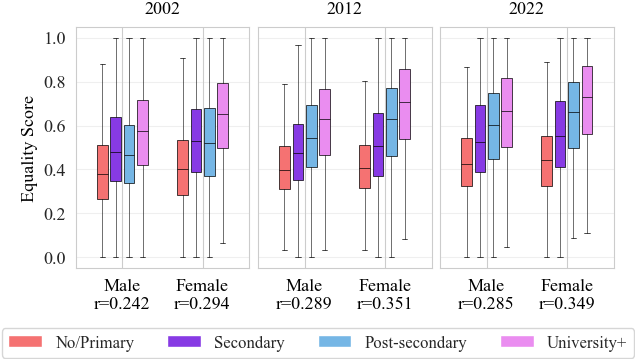

In [17]:
edu_to_num = {
    'No/Primary': 1,
    'Secondary': 2,
    'Post-secondary': 3,
    'University+': 4
}

df_eg_analysis['educ_4_label'] = df_eg_analysis['educ_4_label'].apply(lambda x:  'Post-secondary' if x == 'Post-sec / Short tertiary' else x)
correlation_data_gender = []
for year in [2002, 2012, 2022]:
    for gender in ['Male', 'Female']:
        year_gender_data = df_eg_analysis[(df_eg_analysis['year'] == year) & (df_eg_analysis['sex'] == gender)].copy()
        year_gender_data['edu_num'] = year_gender_data['educ_4_label'].map(edu_to_num)
        if len(year_gender_data) > 1:
            corr = year_gender_data[['edu_num', 'eg_score_norm']].corr().iloc[0, 1]
        else:
            corr = np.nan
        correlation_data_gender.append({'year': year, 'sex': gender, 'correlation': corr})

corr_gender_df = pd.DataFrame(correlation_data_gender)

edu_colors = {
    'No/Primary': "#f57272",
    'Secondary': "#873ae4",
    'Post-secondary': "#75b6e5",
    'University+': "#ea8df0"
}

category_order = ['No/Primary', 'Secondary', 'Post-secondary', 'University+']

fig, axes = plt.subplots(1, 3, figsize=(6, 3.2), sharey=True)
years = [2002, 2012, 2022]

for idx, (ax, year) in enumerate(zip(axes, years)):
    year_data = df_eg_analysis[df_eg_analysis['year'] == year]
    
    year_corr_data = corr_gender_df[corr_gender_df['year'] == year]
    male_corr = year_corr_data[year_corr_data['sex'] == 'Male']['correlation'].values[0]
    female_corr = year_corr_data[year_corr_data['sex'] == 'Female']['correlation'].values[0]
    
    positions = []
    box_data = []
    colors_list = []
    current_pos = 0
    
    for gender in ['Male', 'Female']:
        gender_data = year_data[year_data['sex'] == gender]
        gender_positions = []
        for edu_level in category_order:
            edu_data = gender_data[gender_data['educ_4_label'] == edu_level]['eg_score_norm'].dropna()
            if len(edu_data) > 0:
                box_data.append(edu_data)
                positions.append(current_pos)
                gender_positions.append(current_pos)
                colors_list.append(edu_colors[edu_level])
                current_pos += 0.25
        current_pos += 0.5
    
    bp = ax.boxplot(box_data, positions=positions, widths=0.2, patch_artist=True,
                showfliers=False, 
                medianprops=dict(color='black', linewidth=0.5),
                boxprops=dict(linewidth=0.5),
                whiskerprops=dict(linewidth=0.4),
                capprops=dict(linewidth=0.5))
    
    for patch, color in zip(bp['boxes'], colors_list):
        patch.set_facecolor(color)
        patch.set_alpha(1.0)
    
    male_positions = positions[:4] 
    female_positions = positions[4:8]  
    male_center = np.mean(male_positions)
    female_center = np.mean(female_positions)
    
    ax.set_title(f'{year}', fontsize=13, pad=10, color='black')
    ax.set_xticks([male_center, female_center])
    ax.set_xticklabels([f'Male\nr={male_corr:.3f}', f'Female\nr={female_corr:.3f}'], 
                       fontsize=13, color='black')
    ax.tick_params(axis='y', labelsize=13)
    ax.grid(axis='y', alpha=0.3)
    ax.set_axisbelow(True)

axes[0].set_ylabel('Equality Score', fontsize=13, color='black')


legend_elements = [Patch(facecolor=edu_colors[edu], alpha=1.0, label=edu) 
                   for edu in category_order]
fig.legend(handles=legend_elements, 
          loc='upper center', 
          bbox_to_anchor=(0.5, -0.01),    
          ncol=4, 
          frameon=True, 
          fontsize=12)


plt.savefig('../assets/education_gender_boxplot.pdf', bbox_inches='tight')
plt.show()

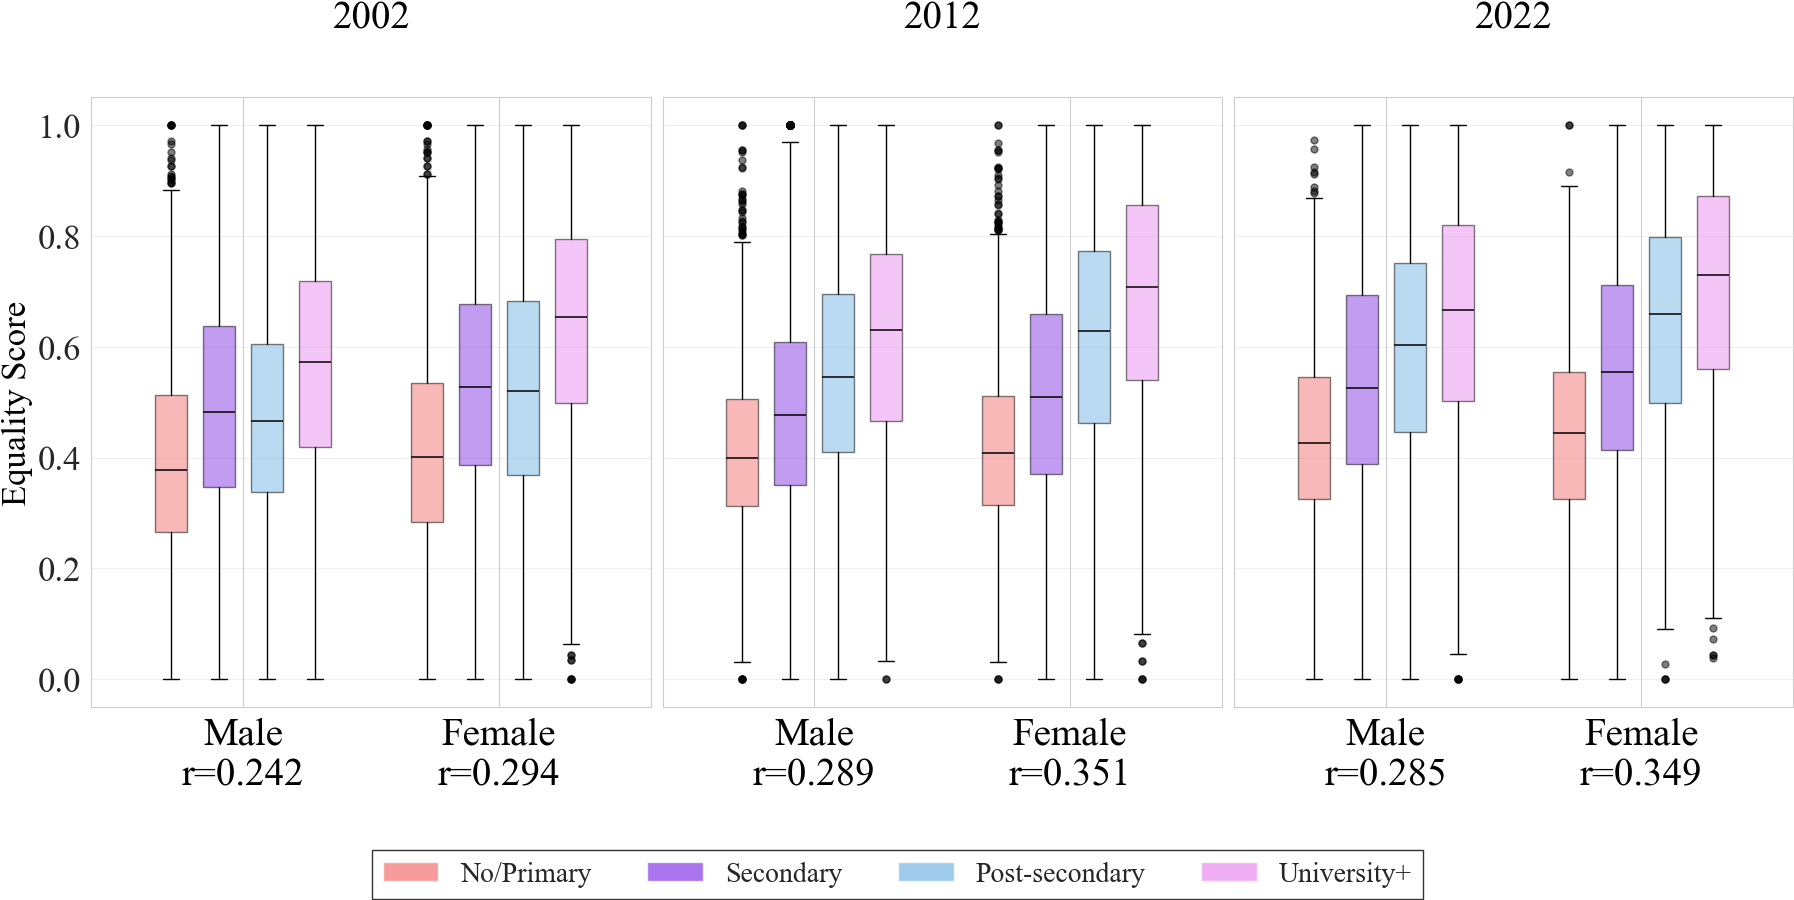

In [18]:
edu_to_num = {
    'No/Primary': 1,
    'Secondary': 2,
    'Post-secondary': 3,
    'University+': 4
}

df_eg_analysis['educ_4_label'] = df_eg_analysis['educ_4_label'].apply(lambda x: 'Post-secondary' if x == 'Post-sec / Short tertiary' else x)

correlation_data_gender = []
for year in [2002, 2012, 2022]:
    for gender in ['Male', 'Female']:
        year_gender_data = df_eg_analysis[(df_eg_analysis['year'] == year) & (df_eg_analysis['sex'] == gender)].copy()
        year_gender_data['edu_num'] = year_gender_data['educ_4_label'].map(edu_to_num)
        if len(year_gender_data) > 1:
            corr = year_gender_data[['edu_num', 'eg_score_norm']].corr().iloc[0, 1]
        else:
            corr = np.nan
        correlation_data_gender.append({'year': year, 'sex': gender, 'correlation': corr})

corr_gender_df = pd.DataFrame(correlation_data_gender)

edu_colors = {
    'No/Primary': "#f57272",
    'Secondary': "#873ae4",
    'Post-secondary': "#75b6e5",
    'University+': "#ea8df0"
}

category_order = ['No/Primary', 'Secondary', 'Post-secondary', 'University+']

fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True, constrained_layout=False)

years = [2002, 2012, 2022]



for idx, (ax, year) in enumerate(zip(axes, years)):
    year_data = df_eg_analysis[df_eg_analysis['year'] == year]
    
    year_corr_data = corr_gender_df[corr_gender_df['year'] == year]
    male_corr = year_corr_data[year_corr_data['sex'] == 'Male']['correlation'].values[0]
    female_corr = year_corr_data[year_corr_data['sex'] == 'Female']['correlation'].values[0]
    
    positions = []
    box_data = []
    colors_list = []
    current_pos = 0
    
    for gender in ['Male', 'Female']:
        gender_data = year_data[year_data['sex'] == gender]
        for edu_level in category_order:
            edu_data = gender_data[gender_data['educ_4_label'] == edu_level]['eg_score_norm'].dropna()
            if len(edu_data) > 0:
                box_data.append(edu_data)
                positions.append(current_pos)
                colors_list.append(edu_colors[edu_level])
                current_pos += 0.3
        current_pos += 0.4
    
    bp = ax.boxplot(box_data, positions=positions, widths=0.2, patch_artist=True,
                showfliers=True, 
                medianprops=dict(color='black', linewidth=1.1),
                flierprops=dict(marker='o', markerfacecolor='black', markersize=5, alpha=0.5))
    
    for patch, color in zip(bp['boxes'], colors_list):
        patch.set_facecolor(color)
        patch.set_alpha(0.5)
    
    male_center = np.mean([positions[i] for i in range(len(category_order))])
    female_center = np.mean([positions[i] for i in range(len(category_order), len(positions))])
    
    ax.set_title(f'{year}', fontsize=28, fontfamily='Times New Roman', pad=50, color='black')
    ax.set_xticks([male_center, female_center])
    ax.set_xticklabels([f'Male\nr={male_corr:.3f}', f'Female\nr={female_corr:.3f}'], 
                       fontsize=28, fontfamily='Times New Roman', color='black')
    ax.tick_params(axis='y', labelsize=25)
    ax.grid(axis='y', alpha=0.3)
    ax.set_axisbelow(True)


axes[0].set_ylabel('Equality Score', fontsize=25, fontfamily='Times New Roman', color='black')

legend_elements = [Patch(facecolor=edu_colors[edu], alpha=0.7, label=edu) 
                   for edu in category_order]

legend = fig.legend(handles=legend_elements,
                   loc='upper center', 
                   bbox_to_anchor=(0.5, -0.05), 
                   ncol=4, 
                   frameon=True, 
                   prop={'family': 'Times New Roman', 'size': 20},
                   edgecolor='black',
                   fancybox=False)

fig.subplots_adjust(top=0.88, bottom=0.1, left=0.06, right=0.98)  

plt.savefig('../assets/education_gender_boxplot.pdf', bbox_inches='tight', 
            pad_inches=0.3, dpi=300) 
plt.show()

In [19]:
df_2002[['eg_score_norm', 'TOPBOT', 'educ_4']].corr()

,eg_score_norm,TOPBOT,educ_4
eg_score_norm,1.000000,0.225508,0.266124
TOPBOT,0.225508,1.000000,0.249231
educ_4,0.266124,0.249231,1.000000


In [20]:
df_2012[['eg_score_norm', 'TOPBOT', 'educ_4']].corr()

,eg_score_norm,TOPBOT,educ_4
eg_score_norm,1.000000,0.231888,0.319979
TOPBOT,0.231888,1.000000,0.347580
educ_4,0.319979,0.347580,1.000000


In [21]:
df_2022[['eg_score_norm', 'TOPBOT', 'educ_4']].corr()

,eg_score_norm,TOPBOT,educ_4
eg_score_norm,1.000000,0.186496,0.319280
TOPBOT,0.186496,1.000000,0.260764
educ_4,0.319280,0.260764,1.000000


In [22]:
df_combined[['eg_score_norm', 'TOPBOT', 'educ_4']].corr()

,eg_score_norm,TOPBOT,educ_4
eg_score_norm,1.000000,0.202498,0.318542
TOPBOT,0.202498,1.000000,0.277182
educ_4,0.318542,0.277182,1.000000


## corr

In [23]:
df_combined.columns

Index(['urban_rural', 'TOPBOT', 'SPWRKHRS', 'sex', 'C_ALPHAN', 'LIVWOMAR',
       'WWYKS', 'WWYKUS', 'SP_DEGREE', 'MOMORFAF', 'MEWH', 'HHTODD',
       'HHCHILDR', 'HHADULT', 'FAM_DIF', 'code_higher_income', 'SHARE_HH',
       'HW_FULFIL', 'WO_WANT', 'WW_FAM_SUFFER', 'WW_CHILD_SUFFER', 'WW_WARM',
       'DIV_HH_COOK', 'DIV_HH_CLEAN', 'DIV_HH_GROC', 'DIV_HH_CARE',
       'DIV_HH_LAUND', 'code_income_control', 'SP_HH_FAM', 'SP_HH', 'LIFE_HAP',
       'DIFF_CONC_WORK', 'HH_TIRED', 'HH_FAM', 'WORK_TIRED', 'hh_wrk_hrs',
       'HH_WEEKEND', 'COHAB', 'marital', 'HOMPOP', 'wrk_hrs', 'educ_4_label',
       'COUNTRY', 'age', 'CASEID', 'v4', 'v5', 'v6', 'v7', 'v8', 'v11',
       'work_status_std', 'spouse_work_status_std', 'educ_4', 'age_bin',
       'eg_score', 'F2_score', 'eg_score_norm', 'F2_score_norm', 'year', 'V5',
       'V6', 'V7', 'V8', 'V9', 'V11', 'v1', 'v2', 'v3'],
      dtype='object')

In [24]:
df_combined['HHTODD'] = df_combined['HHTODD'].fillna(0)
df_combined['HHCHILDR'] = df_combined['HHCHILDR'].fillna(0)
df_combined['total_children'] = df_combined['HHTODD'] + df_combined['HHCHILDR']

In [25]:
df_combined['WW_FAM_SUFFER'].value_counts()

maping_var = {'Strongly agree':1, 'Agree':2, 'Neither agree nor disagree':3, 'Disagree':4, 'Strongly disagree':5}

df_combined['WW_FAM_SUFFER'] = df_combined['WW_FAM_SUFFER'].apply(lambda x: maping_var[x])
df_combined['WW_CHILD_SUFFER'] = df_combined['WW_CHILD_SUFFER'].apply(lambda x: maping_var[x])

In [26]:
r, p = spearmanr(df_combined[(df_combined['sex']=='Male')][['WW_CHILD_SUFFER','total_children']])
print(round(r,4), p)

r, p = spearmanr(df_combined[(df_combined['sex']=='Female')][['WW_CHILD_SUFFER','total_children']])
print(round(r,4), p)


r, p = spearmanr(df_combined[(df_combined['sex']=='Male')][['WW_FAM_SUFFER','total_children']])
print(round(r,4), p)

r, p = spearmanr(df_combined[(df_combined['sex']=='Female')][['WW_FAM_SUFFER','total_children']])
print(round(r,4), p)

-0.0218 7.617978844206916e-05
-0.0351 1.5086612540559715e-11
-0.0305 3.178410117678987e-08
-0.0618 1.4044235305496196e-32


In [27]:
df_combined['total_children_bin'] = df_combined['total_children'].apply(lambda x: 1  if x>0 else 0)

In [28]:
df_combined[(df_combined['total_children_bin']==0) & (df_combined['sex']=='Male')]['WW_CHILD_SUFFER'].mean(), df_combined[(df_combined['total_children_bin']==1) & (df_combined['sex']=='Male')]['WW_CHILD_SUFFER'].mean()

(np.float64(2.8891309082988457), np.float64(2.86358016211018))

In [29]:
r, p = spearmanr(df_combined[(df_combined['sex']=='Male') & (df_combined['year']==2002)][['eg_score_norm','total_children']])
print(round(r,4), p)

r, p = spearmanr(df_combined[(df_combined['sex']=='Female') & (df_combined['year']==2002)][['eg_score_norm','total_children']])
print(round(r,4), p)


r, p = spearmanr(df_combined[(df_combined['sex']=='Male') & (df_combined['year']==2002)][['hh_wrk_hrs','total_children']].dropna())
print(round(r,4), p)

r, p = spearmanr(df_combined[(df_combined['sex']=='Female') & (df_combined['year']==2002)][['hh_wrk_hrs','total_children']].dropna())
print(round(r,4), p)

0.0409 4.863533077127164e-05
-0.0138 0.13146233895709977
0.0182 0.08035187762109547
0.0537 9.196142850420155e-09


In [30]:
r, p = spearmanr(df_combined[(df_combined['sex']=='Female')][['hh_wrk_hrs','total_children']].dropna())
print(round(r,4), p)

0.0542 1.4423136402620134e-24


In [31]:
r, p = spearmanr(df_combined[(df_combined['sex']=='Male') & (df_combined['year']==2012)][['WW_CHILD_SUFFER','total_children']])
print(round(r,4), p)

r, p = spearmanr(df_combined[(df_combined['sex']=='Female') & (df_combined['year']==2012)][['WW_CHILD_SUFFER','total_children']])
print(round(r,4), p)


r, p = spearmanr(df_combined[(df_combined['sex']=='Male') & (df_combined['year']==2012)][['WW_FAM_SUFFER','total_children']])
print(round(r,4), p)

r, p = spearmanr(df_combined[(df_combined['sex']=='Female') & (df_combined['year']==2012)][['WW_FAM_SUFFER','total_children']])
print(round(r,4), p)

-0.0237 0.005806281899278482
-0.0272 0.0010729018133155306
-0.0099 0.2463634958950214
-0.0522 3.437312352929636e-10


In [32]:
r, p = spearmanr(df_combined[(df_combined['sex']=='Male') & (df_combined['year']==2022)][['WW_CHILD_SUFFER','total_children']])
print(round(r,4), p)

r, p = spearmanr(df_combined[(df_combined['sex']=='Female') & (df_combined['year']==2022)][['WW_CHILD_SUFFER','total_children']])
print(round(r,4), p)


r, p = spearmanr(df_combined[(df_combined['sex']=='Male') & (df_combined['year']==2022)][['WW_FAM_SUFFER','total_children']])
print(round(r,4), p)

r, p = spearmanr(df_combined[(df_combined['sex']=='Female') & (df_combined['year']==2022)][['WW_FAM_SUFFER','total_children']])
print(round(r,4), p)

-0.0553 7.15920268789431e-08
-0.0653 2.0853550777097345e-11
-0.0765 8.470722849376375e-14
-0.089 6.342674495736399e-20


# hypothesis testing

In [33]:
df_hypothesis = df_combined[df_combined['eg_score_norm'].notna()].copy()

## HYPOTHESIS 0: The gender equality score of men and women are from different distributions

In [34]:
men_scores = df_hypothesis[df_hypothesis['sex'] == 'Male']['eg_score_norm'].dropna().values
women_scores = df_hypothesis[df_hypothesis['sex'] == 'Female']['eg_score_norm'].dropna().values

obs_diff = women_scores.mean() - men_scores.mean()

# Permutation test
n_perm = 10000
combined = np.concatenate([men_scores, women_scores])
n_men = len(men_scores)
rng = np.random.default_rng(42)
perm_diffs = np.empty(n_perm)

for i in range(n_perm):
    rng.shuffle(combined)
    perm_men = combined[:n_men]
    perm_women = combined[n_men:]
    perm_diffs[i] = perm_women.mean() - perm_men.mean()

# Two-sided p-value
p_value = (np.sum(np.abs(perm_diffs) >= np.abs(obs_diff)) + 1) / (n_perm + 1)

print(f"observed mean difference (W - M): {obs_diff:+.4f}")
print(f"permutation p-value two-sided: {p_value:.4f}")

observed mean difference (W - M): +0.0358
permutation p-value two-sided: 0.0001


## HYPOTHESIS 1: The gender equality gap between men and women are decreasing over the years

In [102]:
df_trend = df_hypothesis[['sex', 'year', 'eg_score_norm']].dropna() 


print("WOMEN\n")
df_women_trend = df_trend[df_trend['sex'] == 'Female'].copy()
yearly_means_women = df_women_trend.groupby('year')['eg_score_norm'].agg(['mean','count'])
print(round(yearly_means_women, 3))

X_year_women = df_women_trend['year'].values
y_eq_women = df_women_trend['eg_score_norm'].values
slope_w, intercept_w, r_w, p_w, se_w = linregress(X_year_women, y_eq_women)
total_change = yearly_means_women.loc[2022, 'mean'] - yearly_means_women.loc[2002, 'mean']
pct_change = (total_change / yearly_means_women.loc[2002, 'mean']) * 100

print(f"slope over years: {slope_w:+.6f} ")
print(f"total change from 2002 to 2022: {total_change:+.4f}, {pct_change:+.2f}%")
print(f"R-squared = {r_w**2:.4f}")
print(f"p-value = {p_w:.4f}")


print("\nMEN\n")
df_men_trend = df_trend[df_trend['sex'] == 'Male'].copy()
yearly_means_men = df_men_trend.groupby('year')['eg_score_norm'].agg(['mean', 'count'])
print(round(yearly_means_men, 3))

X_year_men = df_men_trend['year'].values
y_eq_men = df_men_trend['eg_score_norm'].values
slope_m, intercept_m, r_m, p_m, se_m = linregress(X_year_men, y_eq_men)
total_change_m = yearly_means_men.loc[2022, 'mean'] - yearly_means_men.loc[2002, 'mean']
pct_change_m = (total_change_m / yearly_means_men.loc[2002, 'mean']) * 100


print(f"slope over years: {slope_w:+.6f} ")
print(f"total change from 2002 to 2022: {total_change:+.4f}, {pct_change:+.2f}%")
print(f"R-squared = {r_m**2:.4f}")
print(f"p-value = {p_m:.4f}")

WOMEN

       mean  count
year              
2002  0.514  12020
2012  0.533  14424
2022  0.607  10502
slope over years: +0.004599 
total change from 2002 to 2022: +0.0934, +18.18%
R-squared = 0.0274
p-value = 0.0000

MEN

       mean  count
year              
2002  0.474   9849
2012  0.497  13584
2022  0.574   9489
slope over years: +0.004599 
total change from 2002 to 2022: +0.0934, +18.18%
R-squared = 0.0340
p-value = 0.0000


In [103]:
convergence_data = []
for year in [2002, 2012, 2022]:
    women_mean = df_trend[(df_trend['sex'] == 'Female') & (df_trend['year'] == year)]['eg_score_norm'].mean()
    men_mean = df_trend[(df_trend['sex'] == 'Male') & (df_trend['year'] == year)]['eg_score_norm'].mean()
    
    gap = women_mean - men_mean
    
    convergence_data.append({
        'year': year,
        'Women_Mean': women_mean,
        'Men_Mean': men_mean,
        'abs_gap': abs(gap)
    })

convergence_df = pd.DataFrame(convergence_data)

X_gap = convergence_df['year'].values.reshape(-1, 1)
y_gap = convergence_df['abs_gap'].values
year_centered = convergence_df['year'].values - convergence_df['year'].min()
model_gap = LinearRegression()
model_gap.fit(year_centered.reshape(-1, 1), y_gap)
slope = model_gap.coef_[0]
intercept = model_gap.intercept_
r_squared = model_gap.score(year_centered.reshape(-1, 1), y_gap)
n = len(convergence_df)
residuals = y_gap - (slope * year_centered + intercept)
mse = np.sum(residuals**2) / (n - 2)
var_x = np.sum((year_centered - year_centered.mean())**2)
se_slope = np.sqrt(mse / var_x)
t_stat = slope / se_slope if se_slope > 0 else 0
p_value_two_tailed = 2 * (1 - t_dist.cdf(abs(t_stat), df=n-2))
p_value_one_tailed = 1 - t_dist.cdf(t_stat, df=n-2)  # Direction: is slope negative?

print(f"slope: {slope}")
print(f"R-squared: {r_squared}")
print(f"p-value (two-tailed): {p_value_two_tailed}")
print(f"p-value (one-tailed, gap decreasing): {p_value_one_tailed}")

slope: -0.00032095358722683813
R-squared: 0.9935384596451682
p-value (two-tailed): 0.05122912845426342
p-value (one-tailed, gap decreasing): 0.9743854357728682


## HYPOTHESIS 1: As Gender Equality Score Increases, Women Have Higher Work Participation

In [70]:
def work_status_map(x):
    if x in ['Paid work', 'Retired', 'Education', 'Apprentice/Trainee', 'Military/Community service']:
        return 'progressive'
    elif x in ['Domestic work', 'Unemployed']:
        return 'regressive'
    else:
        return 'other'

In [71]:
df_combined['employed'] = df_combined['work_status_std'].isin(
    ['Paid work', 'Education', 'Apprentice/Trainee', 'Military/Community service']
).astype(int)

df_combined['spouse_employed'] = df_combined['spouse_work_status_std'].isin(
    ['Paid work', 'Education', 'Apprentice/Trainee', 'Military/Community service']
).astype(int)

In [72]:
df_combined[df_combined['sex']=='Male']['employed'].sum() / len(df_combined[df_combined['sex']=='Male'])*100, df_combined[df_combined['sex']=='Female']['employed'].sum() / len(df_combined[df_combined['sex']=='Female'])*100

(np.float64(66.25053155944354), np.float64(55.43495912954041))

In [ ]:
df_women_chi = df_hypothesis[df_hypothesis['sex'] == 'Female'].copy()
df_women_chi['employed'] = df_women_chi['work_status_std'].isin(
    ['Paid work', 'Education', 'Apprentice/Trainee', 'Military/Community service']
).astype(int)
df_women_chi['eq_quartile'] = pd.qcut(
    df_women_chi['eg_score_norm'], 
    q=4, 
    labels=['Q1', 'Q2', 'Q3', 'Q4'],
    duplicates='drop'
)

df_women_chi_clean = df_women_chi[['eq_quartile', 'employed']].dropna()


contingency_women = pd.crosstab(df_women_chi_clean['eq_quartile'], 
                                 df_women_chi_clean['employed'], 
                                 margins=False)

contingency_women_pct = pd.crosstab(df_women_chi_clean['eq_quartile'], 
                                      df_women_chi_clean['employed'], 
                                      normalize='index') * 100
display_table = contingency_women_pct.copy()
display_table.columns = ['Not Employed', 'Employed']
display_table = display_table.round(1)
print(display_table)

chi2_w, p_w, dof_w, expected_w = chi2_contingency(contingency_women)
n_w = contingency_women.values.sum()
min_dim = min(contingency_women.shape) - 1
cramers_v_w = np.sqrt(chi2_w / (n_w * min_dim)) if min_dim > 0 else 0

print(f"Chi-Square Test Results:")
print(f"χ² = {chi2_w:.4f}")
print(f"p-value = {p_w:.4f}")
print(f"Cramér's V = {cramers_v_w:.4f}")

df_men_chi = df_hypothesis[df_hypothesis['sex'] == 'Female'].copy()
df_men_chi['spouse_employed'] = df_men_chi['spouse_work_status_std'].isin(
    ['Paid work', 'Education', 'Apprentice/Trainee', 'Military/Community service']
).astype(int)
df_men_chi['eq_quartile'] = pd.qcut(
    df_men_chi['eg_score_norm'], 
    q=4, 
    labels=['Q1', 'Q2', 'Q3', 'Q4'],
    duplicates='drop'
)
df_men_chi_clean = df_men_chi[['eq_quartile', 'spouse_employed']].dropna()
contingency_men = pd.crosstab(df_men_chi_clean['eq_quartile'], 
                               df_men_chi_clean['spouse_employed'], 
                               margins=False)
contingency_men_pct = pd.crosstab(df_men_chi_clean['eq_quartile'], 
                                    df_men_chi_clean['spouse_employed'], 
                                    normalize='index') * 100
display_table = contingency_men_pct.copy()
display_table.columns = ['Spouse Not Employed', 'Spouse Employed']
display_table = display_table.round(1)
print(display_table)


chi2_m, p_m, dof_m, expected_m = chi2_contingency(contingency_men)
n_m = contingency_men.values.sum()
min_dim = min(contingency_men.shape) - 1
cramers_v_m = np.sqrt(chi2_m / (n_m * min_dim)) if min_dim > 0 else 0

print(f"Chi-Square Test Results:")
print(f"χ² = {chi2_m:.4f}")
print(f"p-value = {p_m:.4f}")
print(f"Cramér's V = {cramers_v_m:.4f}")


summary_data = {
    'Group': ['Women (own employment)', 'Men (spouse employment)'],
    'N': [len(df_women_chi_clean), len(df_men_chi_clean)],
    'χ²': [f"{chi2_w:.4f}", f"{chi2_m:.4f}"],
    'p-value': [f"{p_w:.4f}", f"{p_m:.4f}"],
    'Cramér\'s V': [f"{cramers_v_w:.4f}", f"{cramers_v_m:.4f}"]
}

summary_df = pd.DataFrame(summary_data)
print("\n" + summary_df.to_string(index=False))

             Not Employed  Employed
eq_quartile                        
Q1                   59.3      40.7
Q2                   49.7      50.3
Q3                   40.0      60.0
Q4                   29.3      70.7
Chi-Square Test Results:
χ² = 1866.2635
p-value = 0.0000
Cramér's V = 0.2248
             Spouse Not Employed  Spouse Employed
eq_quartile                                      
Q1                          36.4             63.6
Q2                          32.8             67.2
Q3                          29.8             70.2
Q4                          26.8             73.2
Chi-Square Test Results:
χ² = 216.8616
p-value = 0.0000
Cramér's V = 0.0766

                  Group     N        χ² p-value Cramér's V
 Women (own employment) 36946 1866.2635  0.0000     0.2248
Men (spouse employment) 36946  216.8616  0.0000     0.0766


In [74]:
df_combined[(df_combined['spouse_employed']==0) & (df_combined['sex']=='Male')]['eg_score_norm'].describe(), df_combined[(df_combined['spouse_employed']==1) & (df_combined['sex']=='Male')]['eg_score_norm'].describe()

(count    16399.000000
 mean         0.464640
 std          0.196644
 min          0.000000
 25%          0.322181
 50%          0.449712
 75%          0.597595
 max          1.000000
 Name: eg_score_norm, dtype: float64,
 count    16523.000000
 mean         0.559552
 std          0.205426
 min          0.000000
 25%          0.407537
 50%          0.553015
 75%          0.705350
 max          1.000000
 Name: eg_score_norm, dtype: float64)

In [75]:
df_combined[(df_combined['employed']==0) & (df_combined['sex']=='Female')]['eg_score_norm'].mean(), df_combined[(df_combined['employed']==1) & (df_combined['sex']=='Female')]['eg_score_norm'].mean()

(np.float64(0.491267964186276), np.float64(0.5937865510664788))

## HYPOTHESIS 1: Higher Education Level -> Higher Gender Equality Score

In [69]:
df_h1 = df_hypothesis[df_hypothesis['educ_4'].notna()].copy()

spearman_corr, spearman_p = spearmanr(df_h1['educ_4'], df_h1['eg_score_norm'])
pearson_corr, pearson_p = pearsonr(df_h1['educ_4'], df_h1['eg_score_norm'])

print("Correlation Tests:")
print(f"Spearman correlation: r = {spearman_corr}, p-value = {spearman_p:.4e}")
print(f"Pearson correlation:  r = {pearson_corr}, p-value = {pearson_p:.4e}")

slope, intercept, r_value, p_value, std_err = linregress(df_h1['educ_4'], df_h1['eg_score_norm'])
print(f"Slope = {slope}, R-squared = {r_value**2}, p-value = {p_value:.4e}")

Correlation Tests:
Spearman correlation: r = 0.31026469912780325, p-value = 0.0000e+00
Pearson correlation:  r = 0.318541663216335, p-value = 0.0000e+00
Slope = 0.07053646279842865, R-squared = 0.10146879120462898, p-value = 0.0000e+00


## HYPOTHESIS 2: Gender Equality Score Increases Over Years

In [76]:
slope_year, intercept_year, r_year, p_year, se_year = linregress(df_hypothesis['year'], df_hypothesis['eg_score_norm'])
print(f"Slope = {slope_year:.6f}, R-squared = {r_year**2:.4f}, p-value = {p_year:.4e}")


slope_year, intercept_year, r_year, p_year, se_year = linregress(df_hypothesis[df_hypothesis['sex']=='Female']['year'], df_hypothesis[df_hypothesis['sex']=='Female']['eg_score_norm'])
print(f"slope = {slope_year:.6f}, R-squared = {r_year**2:.4f}, p-value = {p_year:.4e}")


slope_year, intercept_year, r_year, p_year, se_year = linregress(df_hypothesis[df_hypothesis['sex']=='Male']['year'], df_hypothesis[df_hypothesis['sex']=='Male']['eg_score_norm'])
print(f"slope = {slope_year:.6f}, R-squared = {r_year**2:.4f}, p-value = {p_year:.4e}")

print(f"mean eg_score_norm by Year:")
for year in [2002, 2012, 2022]:
    mean_score = df_hypothesis[df_hypothesis['year'] == year]['eg_score_norm'].mean()
    std_score = df_hypothesis[df_hypothesis['year'] == year]['eg_score_norm'].std()
    n = len(df_hypothesis[df_hypothesis['year'] == year])
    print(f"{year}: mean = {mean_score:.4f}, #num = {n}")

Slope = 0.004725, R-squared = 0.0295, p-value = 0.0000e+00
slope = 0.004599, R-squared = 0.0274, p-value = 7.9500e-225
slope = 0.004972, R-squared = 0.0340, p-value = 1.1251e-249
mean eg_score_norm by Year:
2002: mean = 0.4960, #num = 21869
2012: mean = 0.5156, #num = 28008
2022: mean = 0.5915, #num = 19991


## HYPOTHESIS 3: Gender Equality Score Increases Over Time WITHIN Each Education Level

In [77]:
edu_levels = ['No/Primary', 'Secondary', 'Post-sec / Short tertiary', 'University+']

for edu_level in edu_levels:
    print(f"Education Level: {edu_level}")
    df_edu = df_hypothesis[df_hypothesis['educ_4_label'] == edu_level].copy()
    
    slope_edu, intercept_edu, r_edu, p_edu, se_edu = linregress(df_edu['year'], df_edu['eg_score_norm'])
    print(f"slope = {slope_edu:.6f}, R-squared = {r_edu**2:.4f}, p-value = {p_edu:.4e}")
    
summary_results = []
for edu_level in edu_levels:
    df_edu = df_hypothesis[df_hypothesis['educ_4_label'] == edu_level].copy()
    means_by_year = {}
    for year in [2002, 2012, 2022]:
        year_data = df_edu[df_edu['year'] == year]['eg_score_norm']
        if len(year_data) > 0:
            means_by_year[year] = year_data.mean()
    

    slope_edu, _, _, p_edu, _ = linregress(df_edu['year'], df_edu['eg_score_norm'])
    
    summary_results.append({
        'Education Level': edu_level,
        '2002 Mean': means_by_year.get(2002, np.nan),
        '2012 Mean': means_by_year.get(2012, np.nan),
        '2022 Mean': means_by_year.get(2022, np.nan),
        'Slope': slope_edu,
        'p-value': p_edu
    })

summary_df = pd.DataFrame(summary_results)
summary_df

Education Level: No/Primary
slope = 0.001570, R-squared = 0.0041, p-value = 1.3951e-11
Education Level: Secondary
slope = 0.002319, R-squared = 0.0060, p-value = 4.4780e-42
Education Level: Post-sec / Short tertiary
slope = 0.006265, R-squared = 0.0509, p-value = 2.4914e-171
Education Level: University+
slope = 0.003667, R-squared = 0.0215, p-value = 1.6180e-60


,Education Level,2002 Mean,2012 Mean,2022 Mean,Slope,p-value
0,No/Primary,0.405704,0.414835,0.441770,0.001570,1.395122e-11
1,Secondary,0.514519,0.501077,0.550562,0.002319,4.478010e-42
2,Post-sec / Short tertiary,0.502675,0.585842,0.618787,0.006265,2.491395e-171
3,University+,0.600869,0.651634,0.676160,0.003667,1.617954e-60


## HYPOTHESIS 4: As gender equality score increases, the financial control becomes more egaliatarian

In [82]:
df_analysis = df_combined.copy()
df_income = df_analysis[['eg_score_norm', 'code_income_control', 'educ_4_label', 'sex']].dropna()

df_income['eq_quartile'] = pd.qcut(df_income['eg_score_norm'], 
                                     q=4, 
                                     labels=['Low Equality', 'Med-Low', 'Med-High', 'High Equality'])

income_by_eq = df_income.groupby(['eq_quartile', 'code_income_control']).size().reset_index(name='count')
income_by_eq_total = df_income.groupby('eq_quartile').size().reset_index(name='total')
income_by_eq = income_by_eq.merge(income_by_eq_total, on='eq_quartile')
income_by_eq['percentage'] = (income_by_eq['count'] / income_by_eq['total']) * 100

pivot_income = income_by_eq.pivot(index='eq_quartile', 
                                   columns='code_income_control', 
                                   values='percentage').fillna(0)

contingency_table = pd.crosstab(df_income['eq_quartile'], df_income['code_income_control'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square test: chi2 = {chi2:.2f}, p-value = {p_value:.4e}")

Chi-square test: chi2 = 3419.44, p-value = 0.0000e+00


/var/folders/xj/0v15js910cl95xfc7752353r0000gn/T/ipykernel_7258/2945019920.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/xj/0v15js910cl95xfc7752353r0000gn/T/ipykernel_7258/2945019920.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
df_income['eg_score_norm'].describe()

count    66598.000000
mean         0.533317
std          0.213002
min          0.000000
25%          0.372871
50%          0.519596
75%          0.688248
max          1.000000
Name: eg_score_norm, dtype: float64

In [ ]:
round(np.quantile(df_income['eg_score_norm'], 0.25), 3), round(np.quantile(df_income['eg_score_norm'], 0.5),3), round(np.quantile(df_income['eg_score_norm'], 0.75),3), round(np.quantile(df_income['eg_score_norm'], 1),3)

(np.float64(0.373), np.float64(0.52), np.float64(0.688), np.float64(1.0))

In [83]:
df = df_analysis[['eg_score_norm', 'code_income_control']].dropna().copy()
df['code_income_control'] = df['code_income_control'].astype(str).str.strip().str.lower()
print(df['code_income_control'].value_counts())

# One-vs-rest logistic regression for each category
results = []
for cat in sorted(df['code_income_control'].unique()):
    y = (df['code_income_control'] == cat).astype(int)
    X = sm.add_constant(df[['eg_score_norm']])
    
    model = sm.Logit(y, X).fit(disp=False)
    beta = model.params['eg_score_norm']
    pval = model.pvalues['eg_score_norm']

    results.append({
        'category': cat,
        'beta': beta,
        'p-value': pval,
        '#num': int(y.sum())
    })

results_df = pd.DataFrame(results).sort_values('p-value')
print("\nOne-vs-rest results:")
print(results_df.to_string(index=False))

code_income_control
shared        44443
respondent     8808
partner        8054
separate       5811
Name: count, dtype: int64

One-vs-rest results:
  category      beta       p-value  #num
   partner -2.369915  0.000000e+00  8054
    shared  1.691752  0.000000e+00 44443
respondent -2.127187 9.889609e-306  8808
  separate  1.289527  2.117651e-88  5811


In [89]:
unemp_spouse_men = df_combined[(df_combined['sex'] == 'Male') & (df_combined['spouse_employed'] == 0)]['eg_score_norm'].dropna().values
emp_spouse_men = df_combined[(df_combined['sex'] == 'Male') & (df_combined['spouse_employed'] == 1)]['eg_score_norm'].dropna().values


obs_diff = emp_spouse_men.mean() - unemp_spouse_men.mean()

# Permutation test
n_perm = 10000
combined = np.concatenate([unemp_spouse_men, emp_spouse_men])
n_men = len(unemp_spouse_men)

rng = np.random.default_rng(42)
perm_diffs = np.empty(n_perm)

for i in range(n_perm):
    rng.shuffle(combined)
    perm_men = combined[:n_men]
    perm_women = combined[n_men:]
    perm_diffs[i] = perm_women.mean() - perm_men.mean()

# Two-sided p-value
p_value = (np.sum(np.abs(perm_diffs) >= np.abs(obs_diff)) + 1) / (n_perm + 1)

print(f"Observed mean difference: {round(obs_diff, 5)}")
print(f"Permutation p-value (two-sided): {round(p_value, 5)}")

Observed mean difference: 0.09491
Permutation p-value (two-sided): 0.0001


In [90]:
unemp_women = df_combined[(df_combined['sex'] == 'Female') & (df_combined['employed'] == 0)]['eg_score_norm'].dropna().values
emp_women = df_combined[(df_combined['sex'] == 'Female') & (df_combined['employed'] == 1)]['eg_score_norm'].dropna().values


obs_diff = emp_women.mean() - unemp_women.mean()
n_perm = 10000
combined = np.concatenate([unemp_women, emp_women])
n_men = len(unemp_women)

rng = np.random.default_rng(42)
perm_diffs = np.empty(n_perm)

for i in range(n_perm):
    rng.shuffle(combined)
    perm_men = combined[:n_men]
    perm_women = combined[n_men:]
    perm_diffs[i] = perm_women.mean() - perm_men.mean()

# Two-sided p-value
p_value = (np.sum(np.abs(perm_diffs) >= np.abs(obs_diff)) + 1) / (n_perm + 1)

print(f"Observed mean difference: {obs_diff:+.4f}")
print(f"Permutation p-value (two-sided): {p_value:.4f}")

Observed mean difference: +0.1025
Permutation p-value (two-sided): 0.0001


In [91]:
overall_gender = df_combined.groupby(['year', 'sex']).size().reset_index(name='total_count')
overall_gender['overall_percentage'] = overall_gender.groupby('year')['total_count'].transform(lambda x: x / x.sum() * 100)
control_gender = df_combined.groupby(['year', 'code_income_control', 'sex']).size().reset_index(name='count')
control_gender['percentage'] = control_gender.groupby(['year', 'code_income_control'])['count'].transform(lambda x: x / x.sum() * 100)
control_gender = control_gender.merge(overall_gender[['year', 'sex', 'overall_percentage']], on=['year', 'sex'])
control_gender['normalized_percentage'] = (control_gender['percentage'] / control_gender['overall_percentage']) 
fig2 = px.bar(control_gender, 
              x='code_income_control', 
              y='normalized_percentage',
              color='sex',
              facet_col='year',
              title='Gender Distribution Across Financial Control Types by Year (Normalized)',
              labels={'normalized_percentage': 'Normalized Percentage', 'code_income_control': 'Financial Control Type', 'sex': 'Gender'},
              color_discrete_map={'Female': '#E377C2', 'Male': '#1F77B4'},
              text='normalized_percentage',
              height=500)

fig2.update_traces(texttemplate='%{text:.1f}', textposition='inside')

In [92]:
edu_dist = df_combined.groupby(['year', 'sex', 'educ_4_label']).size().reset_index(name='count')
edu_total = df_combined.groupby(['year', 'sex']).size().reset_index(name='total')
edu_dist = edu_dist.merge(edu_total, on=['year', 'sex'])
edu_dist['percentage'] = (edu_dist['count'] / edu_dist['total']) * 100

edu_dist['year'] = edu_dist['year'].astype(str)
category_orders = {
    'educ_4_label': ['No/Primary', 'Secondary', 'Post-sec / Short tertiary', 'University+'],
    'sex': ['Male', 'Female'],
    'year': ['2002', '2012', '2022']
}
edu_colors = {
    'No/Primary': "#f48181",
    'Secondary': "#e69e5f",
    'Post-sec / Short tertiary': "#75e575",
    'University+': "#69b4e9"
}

fig_edu_pub = px.bar(
    edu_dist,
    x='year',
    y='percentage',
    color='educ_4_label',
    facet_row='sex',
    barmode='stack',
    category_orders=category_orders,
    color_discrete_map=edu_colors,
    title='Education Level Distribution by Gender Across Years (100% Stacked)',
    labels={
        'percentage': 'Share (%)',
        'year': 'Year',
        'educ_4_label': 'Education Level'
    },
    height=700
)

fig_edu_pub.update_layout(
    font=dict(size=14, family='Arial'),
    title_font_size=18,
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Education Level',
    margin=dict(l=60, r=30, t=70, b=60),
)

fig_edu_pub.update_xaxes(showgrid=False)
fig_edu_pub.update_yaxes(range=[0, 100], showgrid=True, gridwidth=1, gridcolor='lightgray')
fig_edu_pub.show()

In [93]:
df_eg_analysis = df_combined[df_combined['eg_score_norm'].notna()].copy()

In [94]:
eg_by_education_year = df_eg_analysis.groupby(['year', 'educ_4_label'])['eg_score_norm'].agg(['mean', 'median', 'std', 'count']).reset_index()

category_orders = {
    'educ_4_label': ['No/Primary', 'Secondary', 'Post-sec / Short tertiary', 'University+'],
}

fig_eg_edu_bar = px.bar(eg_by_education_year,
                        x='year',
                        y='mean',
                        color='educ_4_label',
                        barmode='group',
                        title='Average Gender Equality Score by Education Level Across Time<br><sub>Comparing Educational Groups Over Years</sub>',
                        labels={'mean': 'Mean Gender Equality Score',
                                'year': 'Year',
                                'educ_4_label': 'Education Level'},
                        color_discrete_sequence=px.colors.qualitative.Set2,
                        category_orders=category_orders,
                        text='mean',
                        height=500)

fig_eg_edu_bar.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig_eg_edu_bar.update_layout(
    font=dict(size=12, family='Arial'),
    title_font_size=16,
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Education Level'
)

fig_eg_edu_bar.update_xaxes(showgrid=False)
fig_eg_edu_bar.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig_eg_edu_bar.show()

In [95]:
edu_to_num = {
    'No/Primary': 1,
    'Secondary': 2,
    'Post-sec / Short tertiary': 3,
    'University+': 4
}

correlation_data = []
for year in [2002, 2012, 2022]:
    year_data = df_eg_analysis[df_eg_analysis['year'] == year].copy()
    year_data['edu_num'] = year_data['educ_4_label'].map(edu_to_num)
    corr = year_data[['edu_num', 'eg_score_norm']].corr().iloc[0, 1]
    correlation_data.append({'year': year, 'correlation': corr})

corr_df = pd.DataFrame(correlation_data)
corr_df['year_label'] = corr_df.apply(lambda x: f"{int(x['year'])}<br>corr={x['correlation']:.3f}", axis=1)

category_orders = {
    'educ_4_label': ['No/Primary', 'Secondary', 'Post-sec / Short tertiary', 'University+'],
}

fig_eg_edu_box = px.box(df_eg_analysis,
                        x='year',
                        y='eg_score_norm',
                        color='educ_4_label',
                        title='Gender Equality Score Distribution by Education Level Across Time<br><sub>Comparing Educational Groups Over Years</sub>',
                        labels={'eg_score_norm': 'Gender Equality Score',
                                'year': 'Year',
                                'educ_4_label': 'Education Level'},
                        color_discrete_sequence=px.colors.qualitative.Set2,
                        category_orders=category_orders,
                        height=500)
fig_eg_edu_box.update_xaxes(
    ticktext=corr_df['year_label'].tolist(),
    tickvals=corr_df['year'].tolist(),
    showgrid=False
)

fig_eg_edu_box.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig_eg_edu_box.update_layout(
    font=dict(size=25, family='Arial'),
    title_font_size=27.5,
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Education Level',
    boxmode='group'
)

fig_eg_edu_box.show()

In [96]:
years_to_plot = [2002, 2012, 2022]
df_plot = df_combined[df_combined['year'].isin(years_to_plot)].copy()

edu_dist_year = df_plot.groupby(['year', 'educ_4_label']).size().reset_index(name='count')
edu_dist_year_total = df_plot.groupby('year').size().reset_index(name='total')
edu_dist_year = edu_dist_year.merge(edu_dist_year_total, on='year')
edu_dist_year['percentage'] = (edu_dist_year['count'] / edu_dist_year['total']) * 100

df_control = df_plot[df_plot['code_income_control'].notna()].copy()
control_dist_year = df_control.groupby(['year', 'code_income_control']).size().reset_index(name='count')
control_dist_year_total = df_control.groupby('year').size().reset_index(name='total')
control_dist_year = control_dist_year.merge(control_dist_year_total, on='year')
control_dist_year['percentage'] = (control_dist_year['count'] / control_dist_year['total']) * 100

edu_colors = {
    'No/Primary': "#f48181",
    'Secondary': "#e69e5f",
    'Post-sec / Short tertiary': "#75e575",
    'University+': "#69b4e9"
}

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Education Level Distribution', 'Financial Control Distribution'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}]],
    horizontal_spacing=0.15
)

for edu_level in ['No/Primary', 'Secondary', 'Post-sec / Short tertiary', 'University+']:
    edu_data = edu_dist_year[edu_dist_year['educ_4_label'] == edu_level]
    fig.add_trace(
        go.Bar(
            x=edu_data['year'],
            y=edu_data['percentage'],
            name=edu_level,
            marker_color=edu_colors[edu_level],
            text=edu_data['percentage'].round(1),
            textposition='inside',
            textfont=dict(size=10),
            showlegend=True
        ),
        row=1, col=1
    )

control_types_sorted = sorted(df_control['code_income_control'].unique())
control_colors = px.colors.qualitative.Set2

for i, control_type in enumerate(control_types_sorted):
    control_data = control_dist_year[control_dist_year['code_income_control'] == control_type]
    fig.add_trace(
        go.Bar(
            x=control_data['year'],
            y=control_data['percentage'],
            name=control_type,
            marker_color=control_colors[i % len(control_colors)],
            text=control_data['percentage'].round(1),
            textposition='inside',
            textfont=dict(size=10),
            showlegend=True,
            legendgroup='control'
        ),
        row=1, col=2
    )

fig.update_layout(
    title_text='Distribution of Education Level and Financial Control Over Years',
    title_font_size=16,
    height=550,
    width=900,
    font=dict(size=12, family='Arial'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    barmode='stack',
    hovermode='x unified'
)

fig.show()

In [97]:
df_combined['eg_score_binned'] = pd.cut(df_combined['eg_score_norm'], 
                                         bins=10, 
                                         labels=[f'{i/10:.1f}-{(i+1)/10:.1f}' for i in range(10)])

eg_edu_binned = df_combined.groupby(['year', 'eg_score_binned', 'sex', 'educ_4_label']).size().reset_index(name='count')
eg_edu_binned_total = df_combined.groupby(['year', 'eg_score_binned', 'sex']).size().reset_index(name='total')
eg_edu_binned = eg_edu_binned.merge(eg_edu_binned_total, on=['year', 'eg_score_binned', 'sex'])
eg_edu_binned['percentage'] = eg_edu_binned['count'] / eg_edu_binned['total'] * 100

fig_eg_edu_binned = px.bar(eg_edu_binned,
                            x='eg_score_binned',
                            y='percentage',
                            color='educ_4_label',
                            facet_col='sex',
                            facet_row='year',
                            title='Education Level by Gender Equality Score (Binned) and Gender Across Years<br><sub>How Education Relates to Gender Equality Attitudes</sub>',
                            labels={'percentage': 'Percentage (%)',
                                    'eg_score_binned': 'Gender Equality Score Range',
                                    'educ_4_label': 'Education Level'},
                            color_discrete_sequence=px.colors.qualitative.Set2,
                            height=900)

fig_eg_edu_binned.update_layout(
    font=dict(size=11, family='Arial'),
    title_font_size=16,
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Education Level',
    barmode='stack'
)

fig_eg_edu_binned.update_xaxes(showgrid=False, tickangle=-90)
fig_eg_edu_binned.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig_eg_edu_binned.show()

/var/folders/xj/0v15js910cl95xfc7752353r0000gn/T/ipykernel_7258/339822476.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/xj/0v15js910cl95xfc7752353r0000gn/T/ipykernel_7258/339822476.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [98]:
df_combined['age_group'] = pd.cut(df_combined['age'], 
                                   bins=[18, 30, 40, 50, 60, 70, 100],
                                   labels=['18-30', '31-40', '41-50', '51-60', '61-70', '70+'])

edu_by_age_gender = df_combined.groupby(['year', 'age_group', 'sex', 'educ_4_label']).size().reset_index(name='count')
edu_by_age_gender_total = df_combined.groupby(['year', 'age_group', 'sex']).size().reset_index(name='total')
edu_by_age_gender = edu_by_age_gender.merge(edu_by_age_gender_total, on=['year', 'age_group', 'sex'])
edu_by_age_gender['percentage'] = edu_by_age_gender['count'] / edu_by_age_gender['total'] * 100

edu_by_age_gender['age_gender'] = edu_by_age_gender['age_group'].astype(str) + ' - ' + edu_by_age_gender['sex'].str[0]

fig_edu_age = px.bar(edu_by_age_gender,
                     x='age_gender',
                     y='percentage',
                     color='educ_4_label',
                     facet_col='year',
                     barmode='stack',
                     title='Education Level Distribution by Age Group and Gender Across Years<br><sub>Male and Female Side-by-Side Comparison</sub>',
                     labels={'percentage': 'Percentage (%)',
                             'age_gender': 'Age Group - Gender',
                             'educ_4_label': 'Education Level'},
                     color_discrete_sequence=px.colors.qualitative.Set2,
                     height=500)

fig_edu_age.update_layout(
    font=dict(size=12, family='Arial'),
    title_font_size=16,
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Education Level'
)

age_groups_list = ['18-30', '31-40', '41-50', '51-60', '61-70', '70+']
for i in range(len(age_groups_list) - 1):
    fig_edu_age.add_vline(x=i * 2 + 1.5, line_width=2, line_dash="dash", line_color="gray", opacity=0.5)

fig_edu_age.update_xaxes(showgrid=False, tickangle=-90)
fig_edu_age.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig_edu_age.show()

/var/folders/xj/0v15js910cl95xfc7752353r0000gn/T/ipykernel_7258/2743623870.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/xj/0v15js910cl95xfc7752353r0000gn/T/ipykernel_7258/2743623870.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
df_combined['TOPBOT'] = df_combined[['TOPBOT', 'C_ALPHAN']].apply(lambda x: 11-x[0] if x[1] == 'NO' else x[0], axis=1)

/var/folders/xj/0v15js910cl95xfc7752353r0000gn/T/ipykernel_64890/2871864256.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [101]:
control_age_line = df_combined.groupby(['year', 'age', 'code_income_control']).size().reset_index(name='count')
control_age_total = df_combined.groupby(['year', 'age']).size().reset_index(name='total')
control_age_line = control_age_line.merge(control_age_total, on=['year', 'age'])
control_age_line['percentage'] = control_age_line['count'] / control_age_line['total'] * 100

control_age_line = control_age_line[(control_age_line['age'] >= 18) & (control_age_line['age'] <= 80)]

fig_control_age_trend = px.line(control_age_line,
                                 x='age',
                                 y='percentage',
                                 color='code_income_control',
                                 facet_col='year',
                                 title='Financial Control Patterns Across Age by Year<br><sub>Trends in Control Arrangements by Age Over Time</sub>',
                                 labels={'percentage': 'Percentage (%)',
                                         'age': 'Age',
                                         'code_income_control': 'Financial Control'},
                                 color_discrete_sequence=px.colors.qualitative.Set1,
                                 height=500)

fig_control_age_trend.show()